# 트리 모델
- 의사결정 나무 - 분류와 회귀 모델 모두에 사용된다
- 의사결정 나무는 선형으로분류 하는 것이 아닌 노드 라는 이름의 데이터에 대한 질문지를 만들게 된다. 이 질문지의 답은 언제나 True/False로 결정이 된다.

- 순수 노드란 더 이상 질문지를 만드는 것이 무의미한 노드를 의미한다. 결정 경계 안에 있는 클래스의 개수가 한쪽이 0개이면 순수 노드가 된다.

- 의사결정나무는 기본적으로 과적합을 기본으로한다. 따라서 복잡도를 제어 하기 위해서는 사전 가지치기 또는 사후 가지치기 방법을 사용한다.
- 사이킷런은 가지치기 방법을 제공한다.

In [24]:
# pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [25]:
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [11]:
cancer = load_breast_cancer()

x_train,x_test,y_train,y_test = train_test_split(cancer.data,
                                                cancer.target,
                                                stratify=cancer.target,
                                                random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [12]:
print('훈련 세트 정확도 : {:.3f}'.format(tree.score(x_train,y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(tree.score(x_test,y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.937


위 훈련 세트의 정확도가 100%가 나온 이유는 무엇일까요?
- 모든 리프 노드가 순수 노드가 됐기 때문
- 과적합

In [15]:
# 사전 가지치기 적용하기

tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(x_train,y_train)

print('훈련 세트 정확도 : {:.3f}'.format(tree.score(x_train,y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(tree.score(x_test,y_test)))

훈련 세트 정확도 : 0.988
테스트 세트 정확도 : 0.951


트리 모델은 예측으로서드 성능이 괜찮다
- 특성 중요도를 볼 수 있음 ( 트리모델 분석의 메리트)

In [18]:
print('특성 중요도 : \n{}'.format(tree.feature_importances_))

특성 중요도 : 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


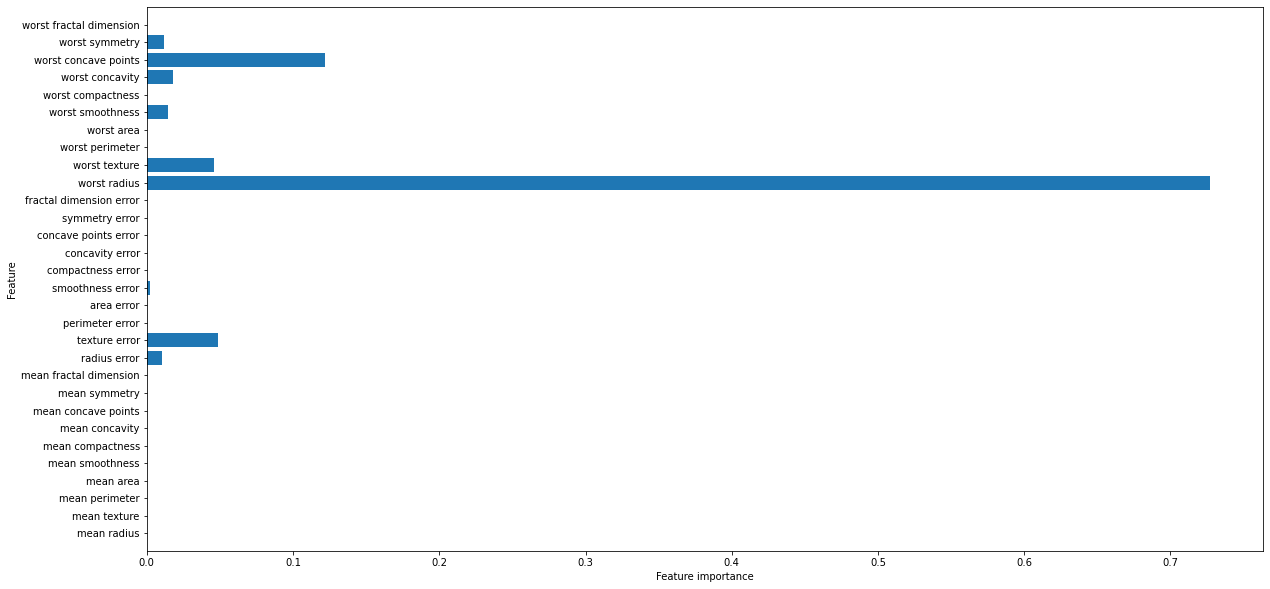

In [21]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.figure(figsize=(20, 10))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_cancer(tree)

특성에 대한 선형 모델과 트리 모델의 차이점
- 선형 모델 : 가중치(weight)를  사용 : 음수 양수로 구분, 가중치가 음수면 음성 클래스를 지지, 가중치가 양수면 양성 클래스를 지지

- 트리 모델 : 특성 중요도만 확인하기 때문에 음성클래스를 지지하는지 양성 클래스를 지지하는지 알 수가 없다.

In [30]:
import os

ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,'ram_price.csv'))

In [32]:
ram_prices.head()

,Unnamed: 0,date,price
0,0,1957.0,411041792.0
1,1,1959.0,67947725.0
2,2,1960.0,5242880.0
3,3,1965.0,2642412.0
4,4,1970.0,734003.0


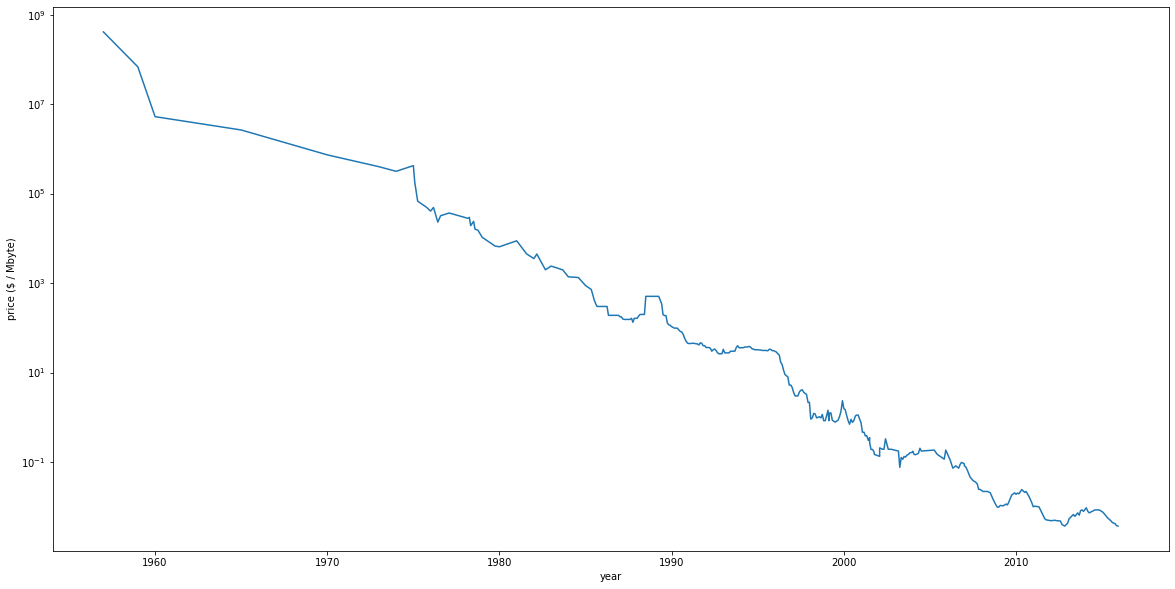

In [36]:
plt.figure(figsize=(20,10))

# semilogy : y축 값의 스케일이 너무 클 때 y값에 log를 씌워 편차를 줄여주는 그래프 
plt.semilogy(ram_prices.date,ram_prices.price)
plt.xlabel('year')
plt.ylabel('price ($ / Mbyte)')
plt.show()

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# 2000년 이전을 훈련 데이터로 , 2000년 이후를 테스트 데이터로

data_train = ram_prices[ram_prices['date']<2000]
data_test = ram_prices[ram_prices['date']>=2000]

In [48]:
# 가격 예측을 하기 위해 날짜 특성만을 이용
# 모델에 데이터를 훈련시키기 위해서는 반드시 2차원 배열 이여야 함
x_train = data_train.date[:,np.newaxis]

# 데이터와 타깃 관계를 간단하게 하기 위해서 로그 스케일 사용
y_train = np.log(data_train.price)

In [49]:
tree = DecisionTreeRegressor().fit(x_train,y_train)
lin_reg = LinearRegression().fit(x_train,y_train)

In [51]:
# 예측용 데이터 만들기 (전체기간)

# 예측용,테스트용 데이터는 무조건 train데이터와 shape[1]값이 똑같아야한다.
x_all = ram_prices.date[:,np.newaxis]

pred_tree = tree.predict(x_all)
pred_lr = lin_reg.predict(x_all)

# semilogy 시각화를 사용할 것이기 때문에 로그스케일의 값을 원래대로 복구하기
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

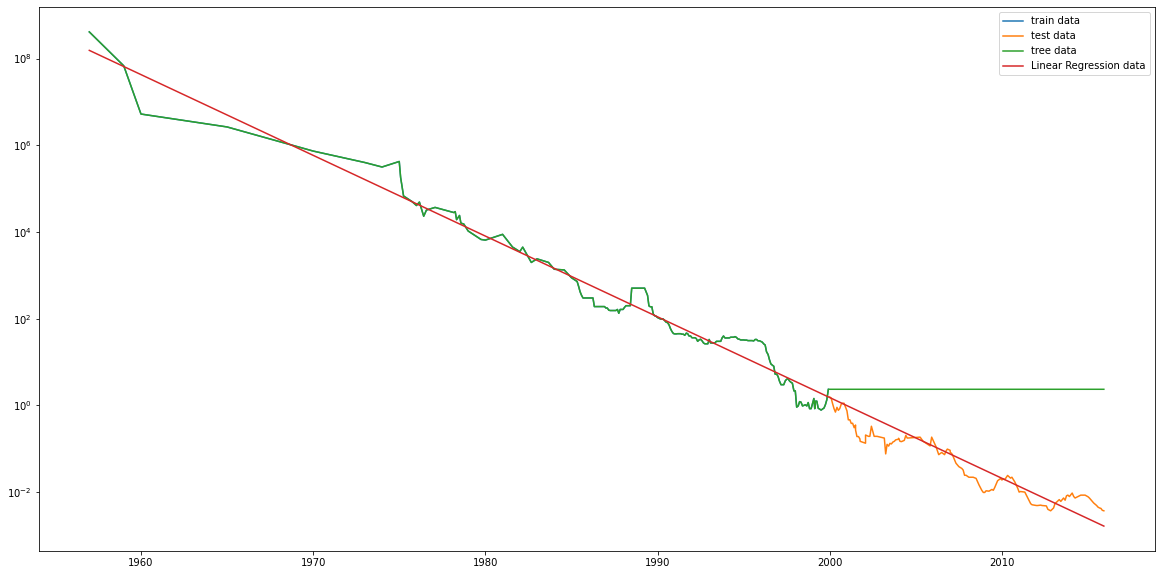

In [57]:
plt.figure(figsize=(20,10))
plt.semilogy(data_train.date,data_train.price,label='train data')
plt.semilogy(data_test.date,data_test.price,label='test data')
plt.semilogy(ram_prices.date,price_tree,label='tree data')
plt.semilogy(ram_prices.date,price_lr,label='Linear Regression data')
plt.legend()
plt.show()

# 앙상블 모델
- 랜덤 포레스트
- 그래디언트 부스팅

둘 다 결정 트리 기반

랜덤 포레스트
- 과적합이 되어있는 트리를 여러개 준비합니다
- 과적합된 트리는 각각 다른 방향을 ㅗ예측을 한다.
- 각각 다른 방향 : 무작위 특성을 활용해서 예측 한다.
- 무작위성을 부여하는 과정 : 부트스트랩 샘플링
- 부트스트랩 샘플링은 전체 데이터 특성에서 무작위로 의사결정트리를 위한 feature로 선정하는 방식

주요 하이퍼 파라미터
- n_estimator : 랜덤 포레스트에서 사용할 나무의 개수. 나무가 많아지면 많아질 수록 복잡도가 증가
- max_features : 부트스트랩 샘플링에 영향을 미친다. 나무에 사용할 샘플의 개수
    - max_features의 값이 전체 특성의 개수와 같다면 무작위성이 안들어간다. 즉 모든 나무가 똑같은 예측을 한다.
    - max_features가 1이면 완전 무작위가 된다. 즉 하나의 트리에 하나의 특성이 여러개가 등록될 수도 있게 된다.

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [60]:
x,y = make_moons(n_samples=100,noise=0.25,random_state=3)

x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,random_state = 42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(x_train,y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

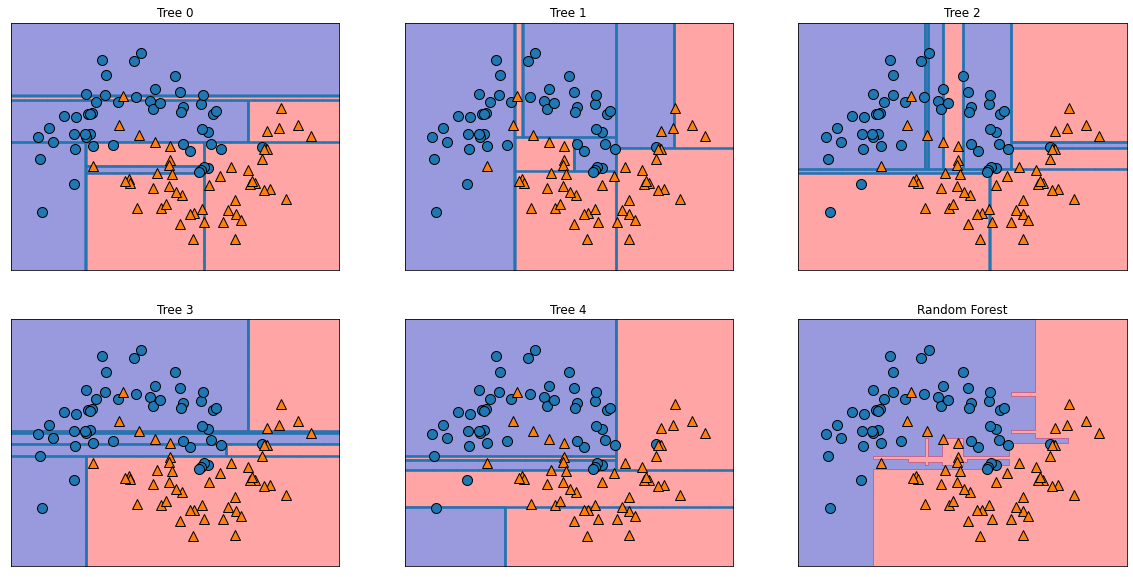

In [62]:
fig, axes = plt.subplots(2,3,figsize=(20,10))

for i , (ax,tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
    ax.set_title('Tree {}'.format(i))
    mglearn.plots.plot_tree_partition(x,y,tree,ax=ax)
    
mglearn.plots.plot_2d_separator(forest,x,fill=True,ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title('Random Forest')
mglearn.discrete_scatter(x[:,0],x[:,1],y)
plt.show()

랜덤 포레스트는 과적합 되어있는 여러개의 트리를 평균낸다.

In [65]:
cancer = load_breast_cancer()

x_train,x_test,y_train,y_test = train_test_split(cancer.data,
                                                cancer.target,
                                                random_state=0)

forest = RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(x_train,y_train)

print('훈련 세트 정확도 : {:.3f}'.format(forest.score(x_train,y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(forest.score(x_test,y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.972


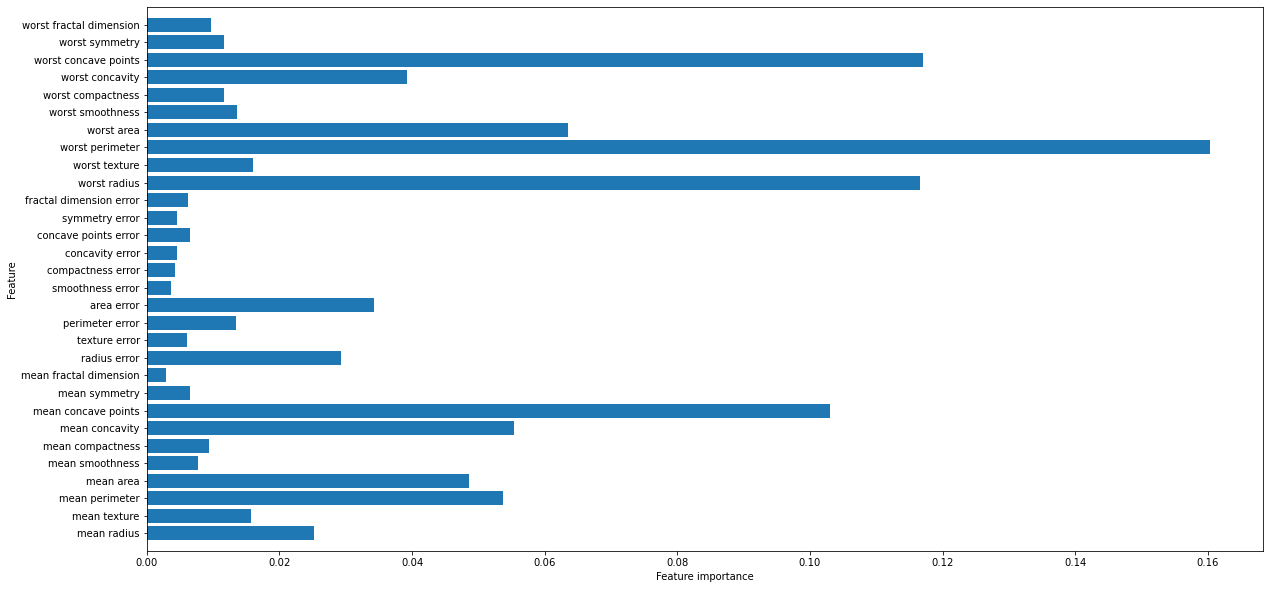

In [66]:
plot_feature_importances_cancer(forest)

그라디언트 부스팅 회귀 트리
- 분류와 회귀 모두에서 사용이 가능
- 과소적합된 트리를 여러개 이어가면서 학습시키는 방법 (집단지성)
- 모든 특성들을 사용하며, 약한 핛브기를 여러개 이어 붙이는 방식

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(x_train,y_train)

print('훈련 세트 정확도 : {:.3f}'.format(gbrt.score(x_train,y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(gbrt.score(x_test,y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.965


일반적으로 그라디언트 부스팅 회귀트리는 learning_rate,max_depth 하이퍼 파라미터로 복잡도를 조절한다.

In [68]:
# 최대깊이(max_depth) 조절하기

gbrt = GradientBoostingClassifier(random_state=0, max_depth = 1)
gbrt.fit(x_train,y_train)

print('훈련 세트 정확도 : {:.3f}'.format(gbrt.score(x_train,y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(gbrt.score(x_test,y_test)))

훈련 세트 정확도 : 0.991
테스트 세트 정확도 : 0.972


In [69]:
# 학습률 조절하기

gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(x_train,y_train)

print('훈련 세트 정확도 : {:.3f}'.format(gbrt.score(x_train,y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(gbrt.score(x_test,y_test)))

훈련 세트 정확도 : 0.988
테스트 세트 정확도 : 0.965


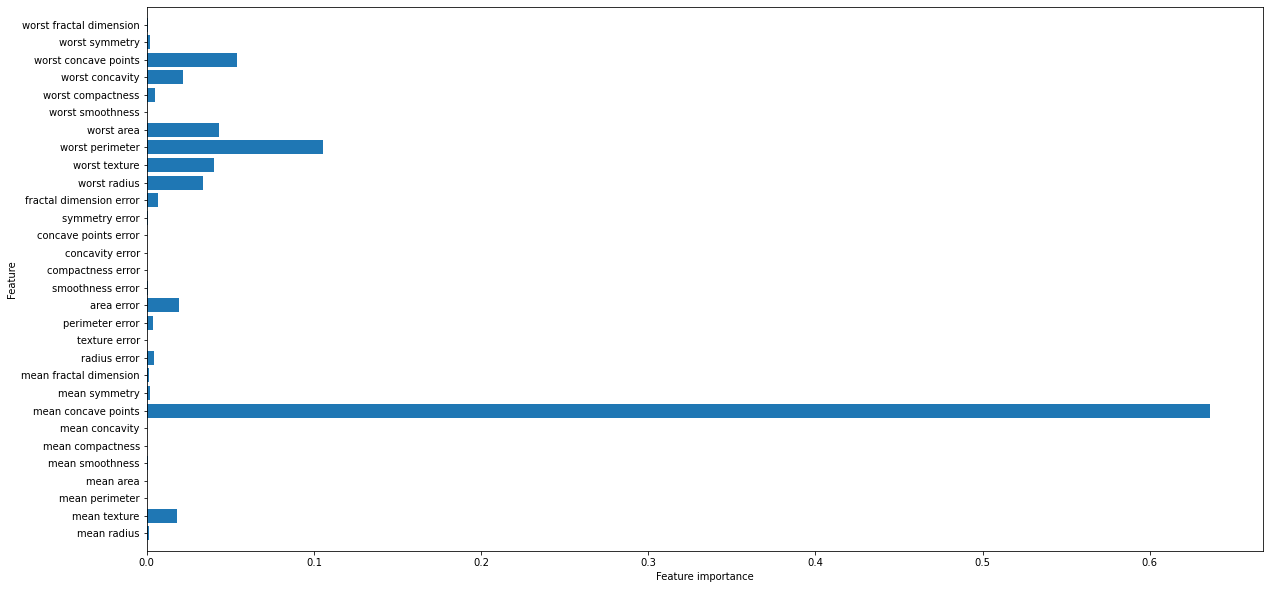

In [70]:
plot_feature_importances_cancer(gbrt)